 # Удовлетворенность пассажиров услугами авиакомпании
    
 ## Описание задачи


 Набор данных содержит опрос удовлетворенности пассажиров услугами авиакомпании.
Необходимо определить к какому из двух уровней принадлежит пассажир: удовлетворённость, неудовлетворенность или нейтральность

## Чтение данных

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [135]:
file = "train.csv"
data = pd.read_csv(file)

 Выведем количество строк и столбцов

In [136]:
data.shape

(103904, 25)

In [137]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Заметим, что строка соответствует мнению конкретного пассажира, а столбцы информации о пассажире. Всего в датасете содержится 22 признака:

1. Gender - пол
2. Customer Type - является ли клиент постоянным или нет
3. Age - возраст
4. Type of Travel - деловое путешествие или личное
5. Class - эконом, эконом плюс или бизнес
6. Flight Distance - расстояние полета
7. Inflight wifi service - уровень удовлетворенности Wi-Fi в полете (1 - 5 или без оценки)
8. Departure/Arrival time convenient - уровень удовлетворенности временем отправления/прибытия (1 - 5 или без оценки)
9. Ease of Online booking - уровень удовлетворенности онлайн-бронированием (1 - 5 или без оценки)
10. Gate location - уровень удовлетворенности местоположением выхода (1 - 5 или без оценки)
11. Food and drink - уровень удовлетворенности едой и напитками (1 - 5 или без оценки)
12. Online boarding - уровень удовлетворенности онлайн-посадкой (1 - 5 или без оценки)
13. Seat comfort - уровень удовлетворенности креслом (1 - 5 или без оценки)
14. Inflight entertainment - уровень удовлетворенности развлечениями в полете (1 - 5 или без оценки)
15. On-board service - уровень удовлетворенности бортовым обслуживанием (1 - 5 или без оценки)
16. Leg room service - уровень удовлетворенности свободным пространством для ног (1 - 5 или без оценки)
17. Baggage handling - уровень удовлетворенности транспортировкой багажа (1 - 5 или без оценки)
18. Checkin service - уровень удовлетворенности службой регистрации (1 - 5 или без оценки)
19. Inflight service - уровень удовлетворенности обслуживанием в полете (1 - 5 или без оценки)
20. Cleanliness - уровень удовлетворенности чистотой (1 - 5 или без оценки)
21. Departure Delay in Minutes - задержка в минутах при отправлении
22. Arrival Delay in Minutes - задержка в минутах при прибытии

## Визуализация данных и вычисление основных характеристик

Для удобства исключим первые 2 столбца, так как они не влияют на классификацию

In [138]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

После этого изменим тип столбцов, которые содержат категориальные признаки

In [139]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

Для количественных призназнаков выведем основные характеристики, где 
1. count - количество значений для каждого признака
2. mean - среднее значение
3. std - стандартное отклонение
4. min - минимальное значение
5. 50% - медиана
6. 25% и 75% - первый и третий квартиль
7. max - максимальное значени

In [141]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Теперь для категориальных признаков выведем характеристики, где
1. count - количество
2. unique - количество уникальных значени
3. top - наиболее часто встречающее значение
4. freq - частота наиболее часто встречающегося значения

In [142]:
data.describe(include=['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


Рассчитаем матрицу корреляции и представим ее графически

In [143]:
corr_matrix = data.corr()
corr_matrix

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


<AxesSubplot:>

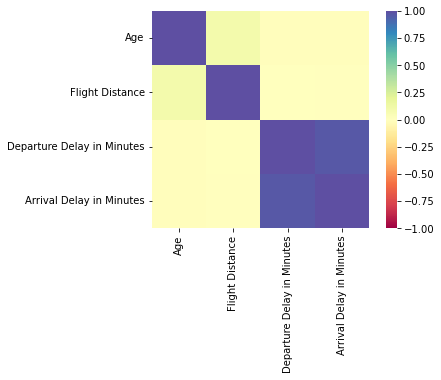

In [144]:
sns.heatmap(corr_matrix, cmap='Spectral', square=True, vmin=-1.0, vmax=1.0)

Без труда видно, что большая корреляция наблюдается между признаками "Задержка отправления" и "Задержка прибытия", что соответствует здравой логике :)

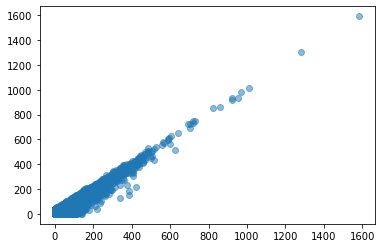

In [145]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5)

Из диаграммы рассеивания для сильно коррелирующих признаков видно, что между признаками "Задержка отправления" и "Задержка прибытия" существует линейная зависимость

## Обработка пропущенных значений

In [146]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Заметим, что пропущенные значения существуют только в признаке "Задержка прибытия". Вычислим медиану для данного числового значение и заполним ей пропущенные. Убедимся в отсутствии пропущенных значений

In [147]:
arrival_median = data['Arrival Delay in Minutes'].median(axis = 0)
data['Arrival Delay in Minutes'].fillna(arrival_median, inplace = True)
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

##  Обработка категориальных признаков

Разделим признаки на категориальные и числовые

In [148]:
num_colum = [c for c in data.columns if data[c].dtype.name != 'category']
num_colum.remove('satisfaction')
categor_colum = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

Разделим категориальные признаки на бинарные и небинарные

In [149]:
binary_colum = [c for c in categor_colum if data_describe[c]['unique'] == 2]
nonbinary_colum = [c for c in categor_colum if data_describe[c]['unique'] > 2]

Для бинарных признаков: заменим значения на 0 и 1

In [150]:
print(binary_colum)

['Gender', 'Customer Type', 'Type of Travel']


In [151]:
print(data['Gender'].unique())
print(data['Customer Type'].unique())
print(data['Type of Travel'].unique())

['Male', 'Female']
Categories (2, object): ['Female', 'Male']
['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']
['Personal Travel', 'Business travel']
Categories (2, object): ['Business travel', 'Personal Travel']


In [152]:
for col in binary_colum:
    data[col] = data[col].cat.codes

In [153]:
print(data['Gender'].describe())

count    103904.000000
mean          0.492541
std           0.499947
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Gender, dtype: float64


In [154]:
print(data['Customer Type'].describe())

count    103904.000000
mean          0.182678
std           0.386404
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Customer Type, dtype: float64


In [155]:
print(data['Type of Travel'].describe())

count    103904.000000
mean          0.310373
std           0.462649
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Type of Travel, dtype: float64


Для небинарных признаков: разделим каждый признак с s значениями на s признаков со значениями 0 и 1

In [156]:
data_nonbin = pd.get_dummies(data[nonbinary_colum])
data_nonbin.describe()

,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,0.248961,0.190503,0.110381,0.051009,...,0.110265,0.195363,0.365193,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365
std,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,0.432413,0.392700,0.313365,0.220016,...,0.313222,0.396482,0.481487,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Нормализация числовых признаков

In [157]:
data_num = data[num_colum]
data_num.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Выполним нормализацию числовых данных. Приведем к виду, где среднее равно нулю, а стандартное отклонение равно единице

In [158]:
data_num = (data_num - data_num.mean()) / data_num.std()
data_num.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-2.062606e-16,1.667322e-16,4.673560e-16,1.740579e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


Соединим все столбцы в одну таблицу

In [159]:
data = pd.concat((data_num, data_nonbin, data[binary_colum], data['satisfaction']), axis = 1)
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Gender,Customer Type,Type of Travel
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,-2.062606e-16,1.667322e-16,4.673560e-16,1.740579e-16,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,...,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365,0.492541,0.182678,0.310373
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,...,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138,0.499947,0.386404,0.462649
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Разбиение данных на обучающую и тестовую выборки

Разделим данные в процентном соотношении 85 к 15

In [163]:
X = data.drop(['satisfaction'], axis = 1)
y = data['satisfaction']


0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object


In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_train.shape[0], X_test.shape[0]

(88318, 15586)

## Классификатор ближайших соседей

Определим лучшее количество соседей из четырех предложенных. Для него найдем процент погрешности на обучающей и тестовой выборках

In [182]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

n = [1, 7, 12, 19]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': n})
grid.fit(X_train, y_train)

best_err = 1 - grid.best_score_
best_n = grid.best_estimator_.n_neighbors
print(best_err, best_n)

knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train, y_train)
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)
print(err_train, err_test)

0.0644829151374321 12
0.054179216014855425 0.06095213653278586


Для оптимального (из 4х предложенных) числа соседей метод KNN показал хороший результат. Погрешность на тренировочной выборке порядка 6%, а на тестовой 5%. Эти данные получены при числе соседей равном 12 и объеме обучающей выборки равном 88318, а тестовой 15586 